# Importing required libraries

In [56]:
import numpy as np
import pandas as pd

# Reading the data files

In [71]:
data = pd.read_csv('../../data/Happiness2019.csv',sep=',')

# Getting an overview of the data

In [72]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [73]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [74]:
data.head()

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


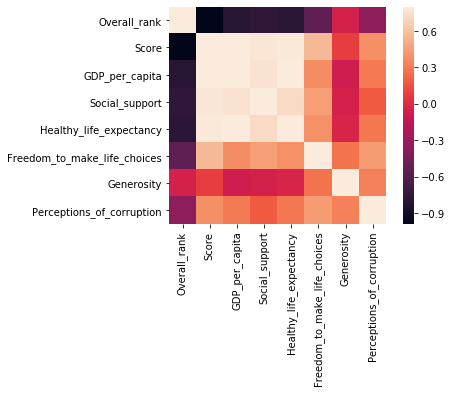

In [75]:
import seaborn as sns
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [76]:
X=data[['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']].values

In [77]:
y=data[['Score']].values

In [78]:
X = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)

$$X=TP^T$$

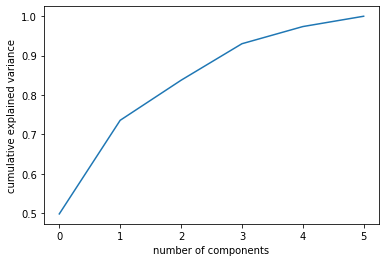

In [79]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [80]:
P=pca.components_
T = X.dot(P.T)

In [81]:
print(P)

[[-0.51459462 -0.49064918 -0.51056655 -0.3809577  -0.05948407 -0.29173692]
 [-0.2278181  -0.22028375 -0.19227192  0.35212182  0.69350669  0.50760633]
 [-0.02380878  0.28141961  0.02808632  0.11855036  0.58081716 -0.7536873 ]
 [ 0.24040185 -0.0633134   0.27480575 -0.81042518  0.41891464  0.17436089]
 [-0.18376376  0.77125906 -0.50935561 -0.24006682 -0.00525099  0.23299691]
 [ 0.76887077 -0.1808102  -0.60547761  0.04905325  0.0514247  -0.06701907]]


First component  [-0.51459462 -0.49064918 -0.51056655 -0.3809577  -0.05948407 -0.29173692]


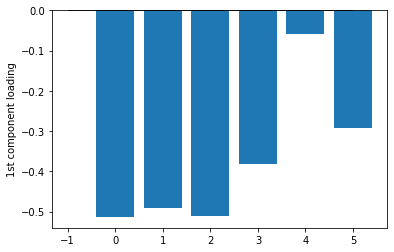

In [82]:
#Loading of the first component
print("First component ", P.T[:,0])
x = np.arange(6)
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
plt.ylabel("1st component loading")
plt.show()

Second component  [-0.2278181  -0.22028375 -0.19227192  0.35212182  0.69350669  0.50760633]


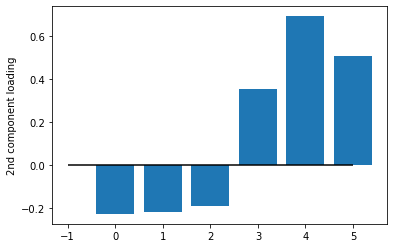

In [83]:
#Loading of the first component
print("Second component ", P.T[:,1])
x = np.arange(6)
plt.bar(x, height= P.T[:,1])
plt.hlines(0,-1,5)
#plt.xticks(x+.1, ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'])
plt.ylabel("2nd component loading")
plt.show()

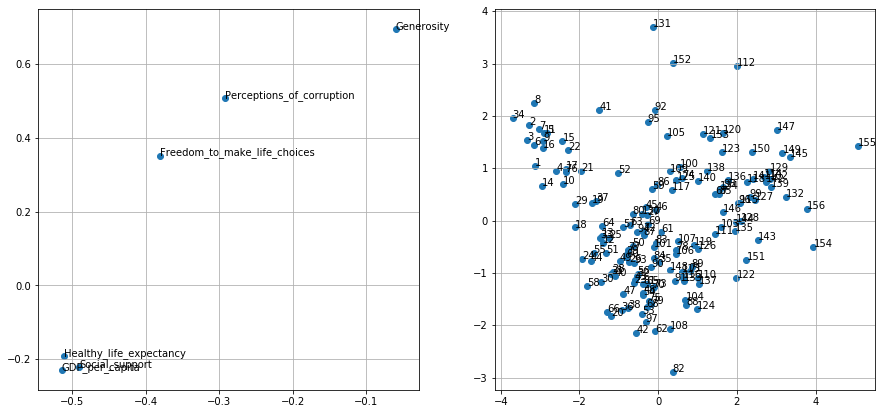

In [84]:
'GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'
variables = ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']
n = np.linspace(1,len(X),len(X)).astype(int)
n = n.tolist()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 7))
ax1.scatter(P[0,:], P[1,:])
ax1.grid()
for i, txt in enumerate(variables):
    ax1.annotate(txt, (P[0,i], P[1,i]))
    
plt.grid()
#plt.show()

#fig, ax = plt.subplots()
ax2.scatter(T[:,0], T[:,1])
ax2.grid()
for i, txt in enumerate(n):
    ax2.annotate(txt,(T[i,0], T[i,1]))
plt.grid()
plt.show()

In [86]:
print(data['Country_or_region'][34])
print(data['Country_or_region'])

El Salvador
0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
5                   Switzerland
6                        Sweden
7                   New Zealand
8                        Canada
9                       Austria
10                    Australia
11                   Costa Rica
12                       Israel
13                   Luxembourg
14               United Kingdom
15                      Ireland
16                      Germany
17                      Belgium
18                United States
19               Czech Republic
20         United Arab Emirates
21                        Malta
22                       Mexico
23                       France
24                       Taiwan
25                        Chile
26                    Guatemala
27                 Saudi Arabia
28                        Qatar
29                        Spain
                 ...        

# Reference

<a href='https://www.kaggle.com/unsdsn/world-happiness'>Data Source</a>